# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

## Diabetes Solution

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()


In [4]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/hbvdf6y2dqlpzjsc5ho5yboxy3tz7l')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df_num= df.to_numpy()

In [8]:
X_data = df_num[:,0:-1]
Y_data= df_num[:,-1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,test_size=.2)

In [41]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [43]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#activation='sigmoid'
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=10 , validation_data=(X_test, y_test))

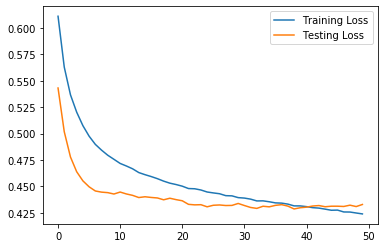

In [45]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

In [26]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [28]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [31]:
X_train_scaled.shape

(426, 30)

## Constructing a Neural Network in Keras

In [32]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

# Importing our optimizer

from keras.optimizers import Adam

In [33]:
model = Sequential()

inputs = X_train.shape[1]
hiddens = inputs

model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1))

In [34]:
adam = Adam()
model.compile(optimizer=adam, loss='mean_squared_error')

In [72]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=20)

Train on 426 samples, validate on 143 samples
Epoch 1/20
426/426 [==============================] - 0s 959us/step - loss: 756.3595 - val_loss: 281.1119
Epoch 2/20
426/426 [==============================] - 0s 32us/step - loss: 523.4333 - val_loss: 136.3651
Epoch 3/20
426/426 [==============================] - 0s 30us/step - loss: 292.3563 - val_loss: 91.1366
Epoch 4/20
426/426 [==============================] - 0s 28us/step - loss: 208.4868 - val_loss: 88.3662
Epoch 5/20
426/426 [==============================] - 0s 37us/step - loss: 152.2601 - val_loss: 63.6905
Epoch 6/20
426/426 [==============================] - 0s 36us/step - loss: 121.1165 - val_loss: 57.1051
Epoch 7/20
426/426 [==============================] - 0s 36us/step - loss: 103.8066 - val_loss: 43.5244
Epoch 8/20
426/426 [==============================] - 0s 38us/step - loss: 78.2123 - val_loss: 34.6458
Epoch 9/20
426/426 [==============================] - 0s 40us/step - loss: 50.8266 - val_loss: 14.5160
Epoch 10/20
426/4

In [73]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, verbose=0, batch_size=200)

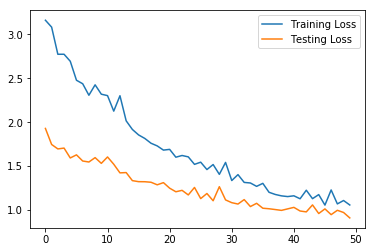

In [75]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

In [78]:
np.hstack([model.predict(X_test), y_test.reshape(143, 1)])[:20]

array([[ 1.7878108 ,  0.        ],
       [ 0.09527735,  1.        ],
       [ 0.29361302,  0.        ],
       [ 0.29341656,  1.        ],
       [ 1.53534651,  1.        ],
       [ 0.86772305,  1.        ],
       [ 0.64316326,  1.        ],
       [ 0.39329678,  1.        ],
       [ 2.42046118,  1.        ],
       [-0.31139034,  1.        ],
       [ 1.15224028,  1.        ],
       [ 1.60685682,  1.        ],
       [ 0.61910015,  1.        ],
       [-0.04664655,  1.        ],
       [ 1.44874716,  1.        ],
       [ 0.48920685,  0.        ],
       [ 0.50558335,  1.        ],
       [ 1.39238691,  1.        ],
       [ 2.93659544,  1.        ],
       [-0.97641224,  1.        ]])

In [50]:
model.evaluate(X_test, y_test)

143/143 [==============================] - 0s 37us/step


24.037291426758667

## Constructing a Neural Network in ("Base") Tensorflow

In [9]:
import tensorflow as tf

In [13]:
var_1 = tf.Variable(3)
var_2 = tf.Variable(2)

var_3 = var_1 * var_2
var_4 = var_1 + var_3 * var_2

In [15]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(var_4)

In [16]:
print(result)

15


In [39]:
X_train_scaled.shape

(426, 30)

In [45]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [48]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_scaled, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.34965034965034963